# Initializes the algorithm and shows the ideal classification

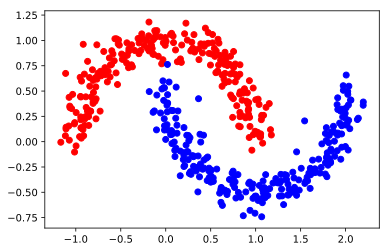

[1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 

In [8]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg', 'pdf')

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons

n = 500
n_labeled = 10
alpha = 0.99
sigma = 0.2

X, Y = make_moons(n, shuffle=True, noise=0.1, random_state=None)

color = ['red' if l == 0 else 'blue' for l in Y]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.savefig("ideal_classification.pdf", format='pdf')
plt.show()

Y_input = np.concatenate(((Y[:n_labeled,None] == np.arange(2)).astype(float), np.zeros((n-n_labeled,2))))
print(Y)

## Step 1: Construct the affinity matrix W

In [2]:
dm = cdist(X, X, 'euclidean')
rbf = lambda x, sigma: math.exp((-x)/(2*(math.pow(sigma,2))))
vfunc = np.vectorize(rbf)
W = vfunc(dm, sigma)
np.fill_diagonal(W, 0)

## Step 2: Calculate S such as S = D^(-1/2)*W*D^(-1/2)

In [3]:
def calculate_S(W):
    d = np.sum(W, axis=1)
    D = np.sqrt(d*d[:, np.newaxis])
    return np.divide(W,D,where=D!=0)

S = calculate_S(W)

## Result of one iteration

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 

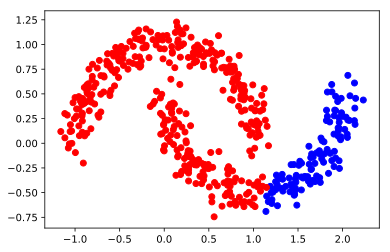

In [4]:
F = np.dot(S, Y_input)*alpha + (1-alpha)*Y_input

Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

print(F.argmax(1))

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_1.pdf", format='pdf')
plt.show()

## Step 3: Iterate F "n_iter" times until it converge.

In [5]:
n_iter = 400
alpha = 1.0
for t in range(n_iter):
#     F = np.dot(S, F)*alpha + (1-alpha)*Y_input
    F = np.dot(S, F)*alpha

print(F)

[[0.01260943 0.00577182]
 [0.01931614 0.0021554 ]
 [0.01952211 0.00290516]
 [0.02199715 0.00288918]
 [0.01897061 0.00286451]
 [0.02097678 0.00239781]
 [0.0167778  0.00359326]
 [0.01030913 0.00478063]
 [0.02208405 0.00353023]
 [0.01665149 0.00258301]
 [0.01608191 0.00355733]
 [0.01175481 0.00444325]
 [0.00847876 0.0033778 ]
 [0.00880732 0.00180037]
 [0.02033398 0.00261103]
 [0.01073774 0.00516114]
 [0.01548566 0.0034036 ]
 [0.01167059 0.0053217 ]
 [0.01010457 0.00245612]
 [0.01753576 0.00498064]
 [0.00963128 0.00468039]
 [0.01977957 0.00218789]
 [0.01830816 0.00298765]
 [0.02354205 0.00279497]
 [0.00864262 0.00422496]
 [0.01447545 0.00526356]
 [0.01161145 0.00469102]
 [0.01222536 0.00316337]
 [0.01476977 0.0040247 ]
 [0.01218387 0.00590287]
 [0.01401502 0.00596787]
 [0.01896848 0.00242619]
 [0.01737329 0.00561271]
 [0.01402092 0.00264707]
 [0.01866467 0.00266884]
 [0.01496077 0.00220435]
 [0.01851144 0.00278542]
 [0.01899188 0.00218494]
 [0.01993128 0.00325354]
 [0.00922973 0.00451525]


## Step 4: Classify X according to F.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

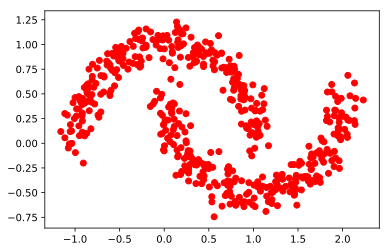

In [6]:
Y_result = np.zeros_like(F)
Y_result[np.arange(len(F)), F.argmax(1)] = 1

print(F.argmax(1))

Y_v = [1 if x == 0 else 0 for x in Y_result[0:,0]]

color = ['red' if l == 0 else 'blue' for l in Y_v]
plt.scatter(X[0:,0], X[0:,1], color=color)
#plt.savefig("iter_n.pdf", format='pdf')
plt.show()